(array([0., 0., 0., 1., 7., 0., 2., 2., 0., 0.]),
 array([0.25, 0.75, 1.25, 1.75, 2.25, 2.75, 3.25, 3.75, 4.25, 4.75, 5.25]),
 <BarContainer object of 10 artists>)

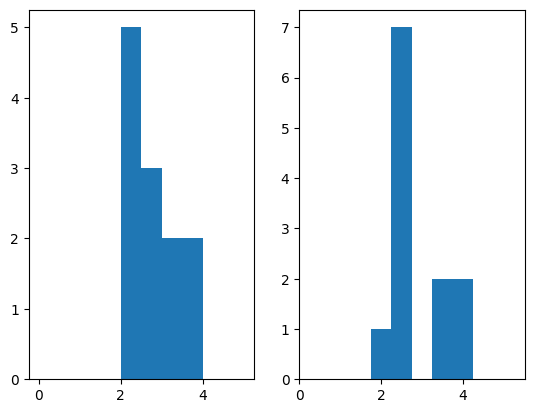

In [5]:
import numpy as np
import matplotlib.pyplot as plt

a = [2.1, 2.4, 2.3, 2.4, 2.47, 2.7, 2.6, 2.65, 3.3, 3.39, 3.8, 3.87]
plt.subplot(121)
plt.hist(a, 10, range=(0.0, 5)) # (data, N-bins, range=(start,end) )
plt.subplot(122)
plt.hist(a, 10, range=(0.25, 5.25))

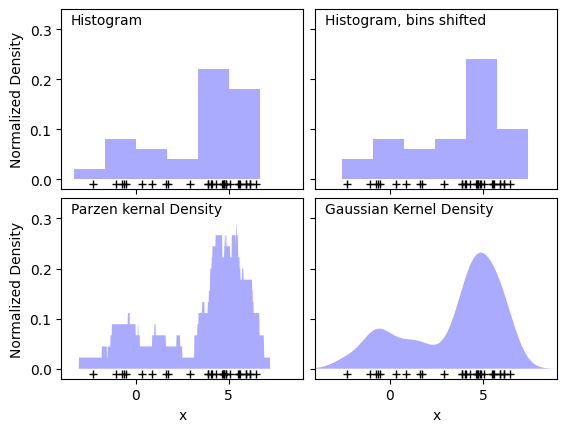

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

np.random.seed(1)
N = 30
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)), # 평균이 0이고 표준편차가 1인 정규 분포를 생성한다. 개수는 0.3 * 30 = 9개이다.
                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis] # 평균이 5이고 표준편차가 1인 정규 분포를 생성한다. 개수는 0.7 * 30 = 21개이다.
# 즉, 총 30개의 무작위 정규 분포 세트를 연결하여 최종 데이터 집합 X를 형성한다.
X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]
bins = np.linspace(-5, 10, 10)

fig, ax = plt.subplots(2, 2, sharex=True, sharey=True) # 2x2 크기의 subplot을 생성하고, 동일한 x 및 y축을 공유하도록 설정한다.
fig.subplots_adjust(hspace=0.05, wspace=0.05) # subplot들 간의 수평 및 수직 간격을 조절한다. 값이 작을수록 subplot들이 더 가까이 붙게 된다.

# histogram 1
ax[0,0].hist(X[:, 0], bins = bins, fc = '#AAAAFF', density = True)
ax[0,0].text(-3.5, 0.31, "Histogram")

# histogram 2
ax[0,1].hist(X[:, 0], bins = bins + 0.75, fc = "#AAAAFF", density = True)
ax[0,1].text(-3.5, 0.31, "Histogram, bins shifted")

# tophat KDE
kde = KernelDensity(kernel='tophat', bandwidth=0.75) # 사각형 모양의 커널 함수 "tophat", bandwidth는 추정된 확률 밀도 함수의 모양을 결정한다.
kde.fit(X) # KDE모델을 주어진 데이터 X에 대해 학습한다.
log_dens = kde.score_samples(X_plot) # 로그 확률 밀도를 계산한다. 수치적으로 안전적이고, 로그 스케일에서 작업을 수행할 때 유용하기 때문.
ax[1, 0].fill(X_plot[:, 0], np.exp(log_dens), fc = "#AAAAFF") # x축에 X_plot, y축에 log_dens. np.exp는 로그 스케일로 계산된 값을 원래 스케일로 변환한다.
ax[1, 0].text(-3.5, 0.31, "Parzen kernal Density")

# Gaussian KDE
kde = KernelDensity(kernel="gaussian", bandwidth=0.75)
kde.fit(X)
log_dens = kde.score_samples(X_plot)
ax[1, 1].fill(X_plot[:, 0], np.exp(log_dens), fc="#AAAAFF")
ax[1, 1].text(-3.5, 0.31, "Gaussian Kernel Density")

for axi in ax.ravel(): # ax.ravel() 메서드는 다차원 배열을 1차원 배열로 falt하게 하는 메서드이다. 즉, ax는 2x2행렬이므로, ax.ravel()은 이를 1차원 배열로 반환한다.
  axi.plot(X[:, 0], np.full(X.shape[0], -0.01), '+k')
  axi.set_xlim(-4, 9)
  axi.set_ylim(-0.02, 0.34)

for axi in ax[:, 0]:
  axi.set_ylabel('Normalized Density')

for axi in ax[1, :]:
  axi.set_xlabel('x')


30
